In [2]:
import pickle
from math import *
from overlap_calc import *
import csv
from collections import namedtuple
gene_overlap = pickle.load(open('ucsc_overlaps_300.pkl', 'rb'))
gene_overlap_elife = pickle.load(open('hs_elife_overlaps.pkl', 'rb'))
species = set()
o2os = { k:set() for k in gene_overlap.keys() }
ortho = namedtuple('one2one', ['lgene', 'lspecies', 'rgene', 'rspecies'])
with open('/data/db/one2one.csv') as file:
    for o in (ortho(l['gl.stable_id'], l['namel.name'], l['gr.stable_id'], l['namer.name']) for l in csv.DictReader(file, fieldnames=['gl.stable_id', 'namel.name', 'gr.stable_id', 'namer.name'], quotechar='"')):
        species.add(o.rspecies)
        if 'gene:'+o.lgene in o2os:
            o2os['gene:'+o.lgene].add(o.rspecies)
cpg_less, cpg_full = split_overlaps(gene_overlap)
cpg_less_elife, cpg_full_elife = split_overlaps(gene_overlap_elife)

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]


In [3]:
from seaborn import violinplot, despine, boxplot, barplot
from pandas import DataFrame
from matplotlib import pyplot

frame=DataFrame.from_records([(bo, len([g for g in cpg_less if bo in o2os[g]])/len(cpg_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full if bo in o2os[g]])/len(cpg_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frame=frame.sort_values("Orthologs", ascending=False)


In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

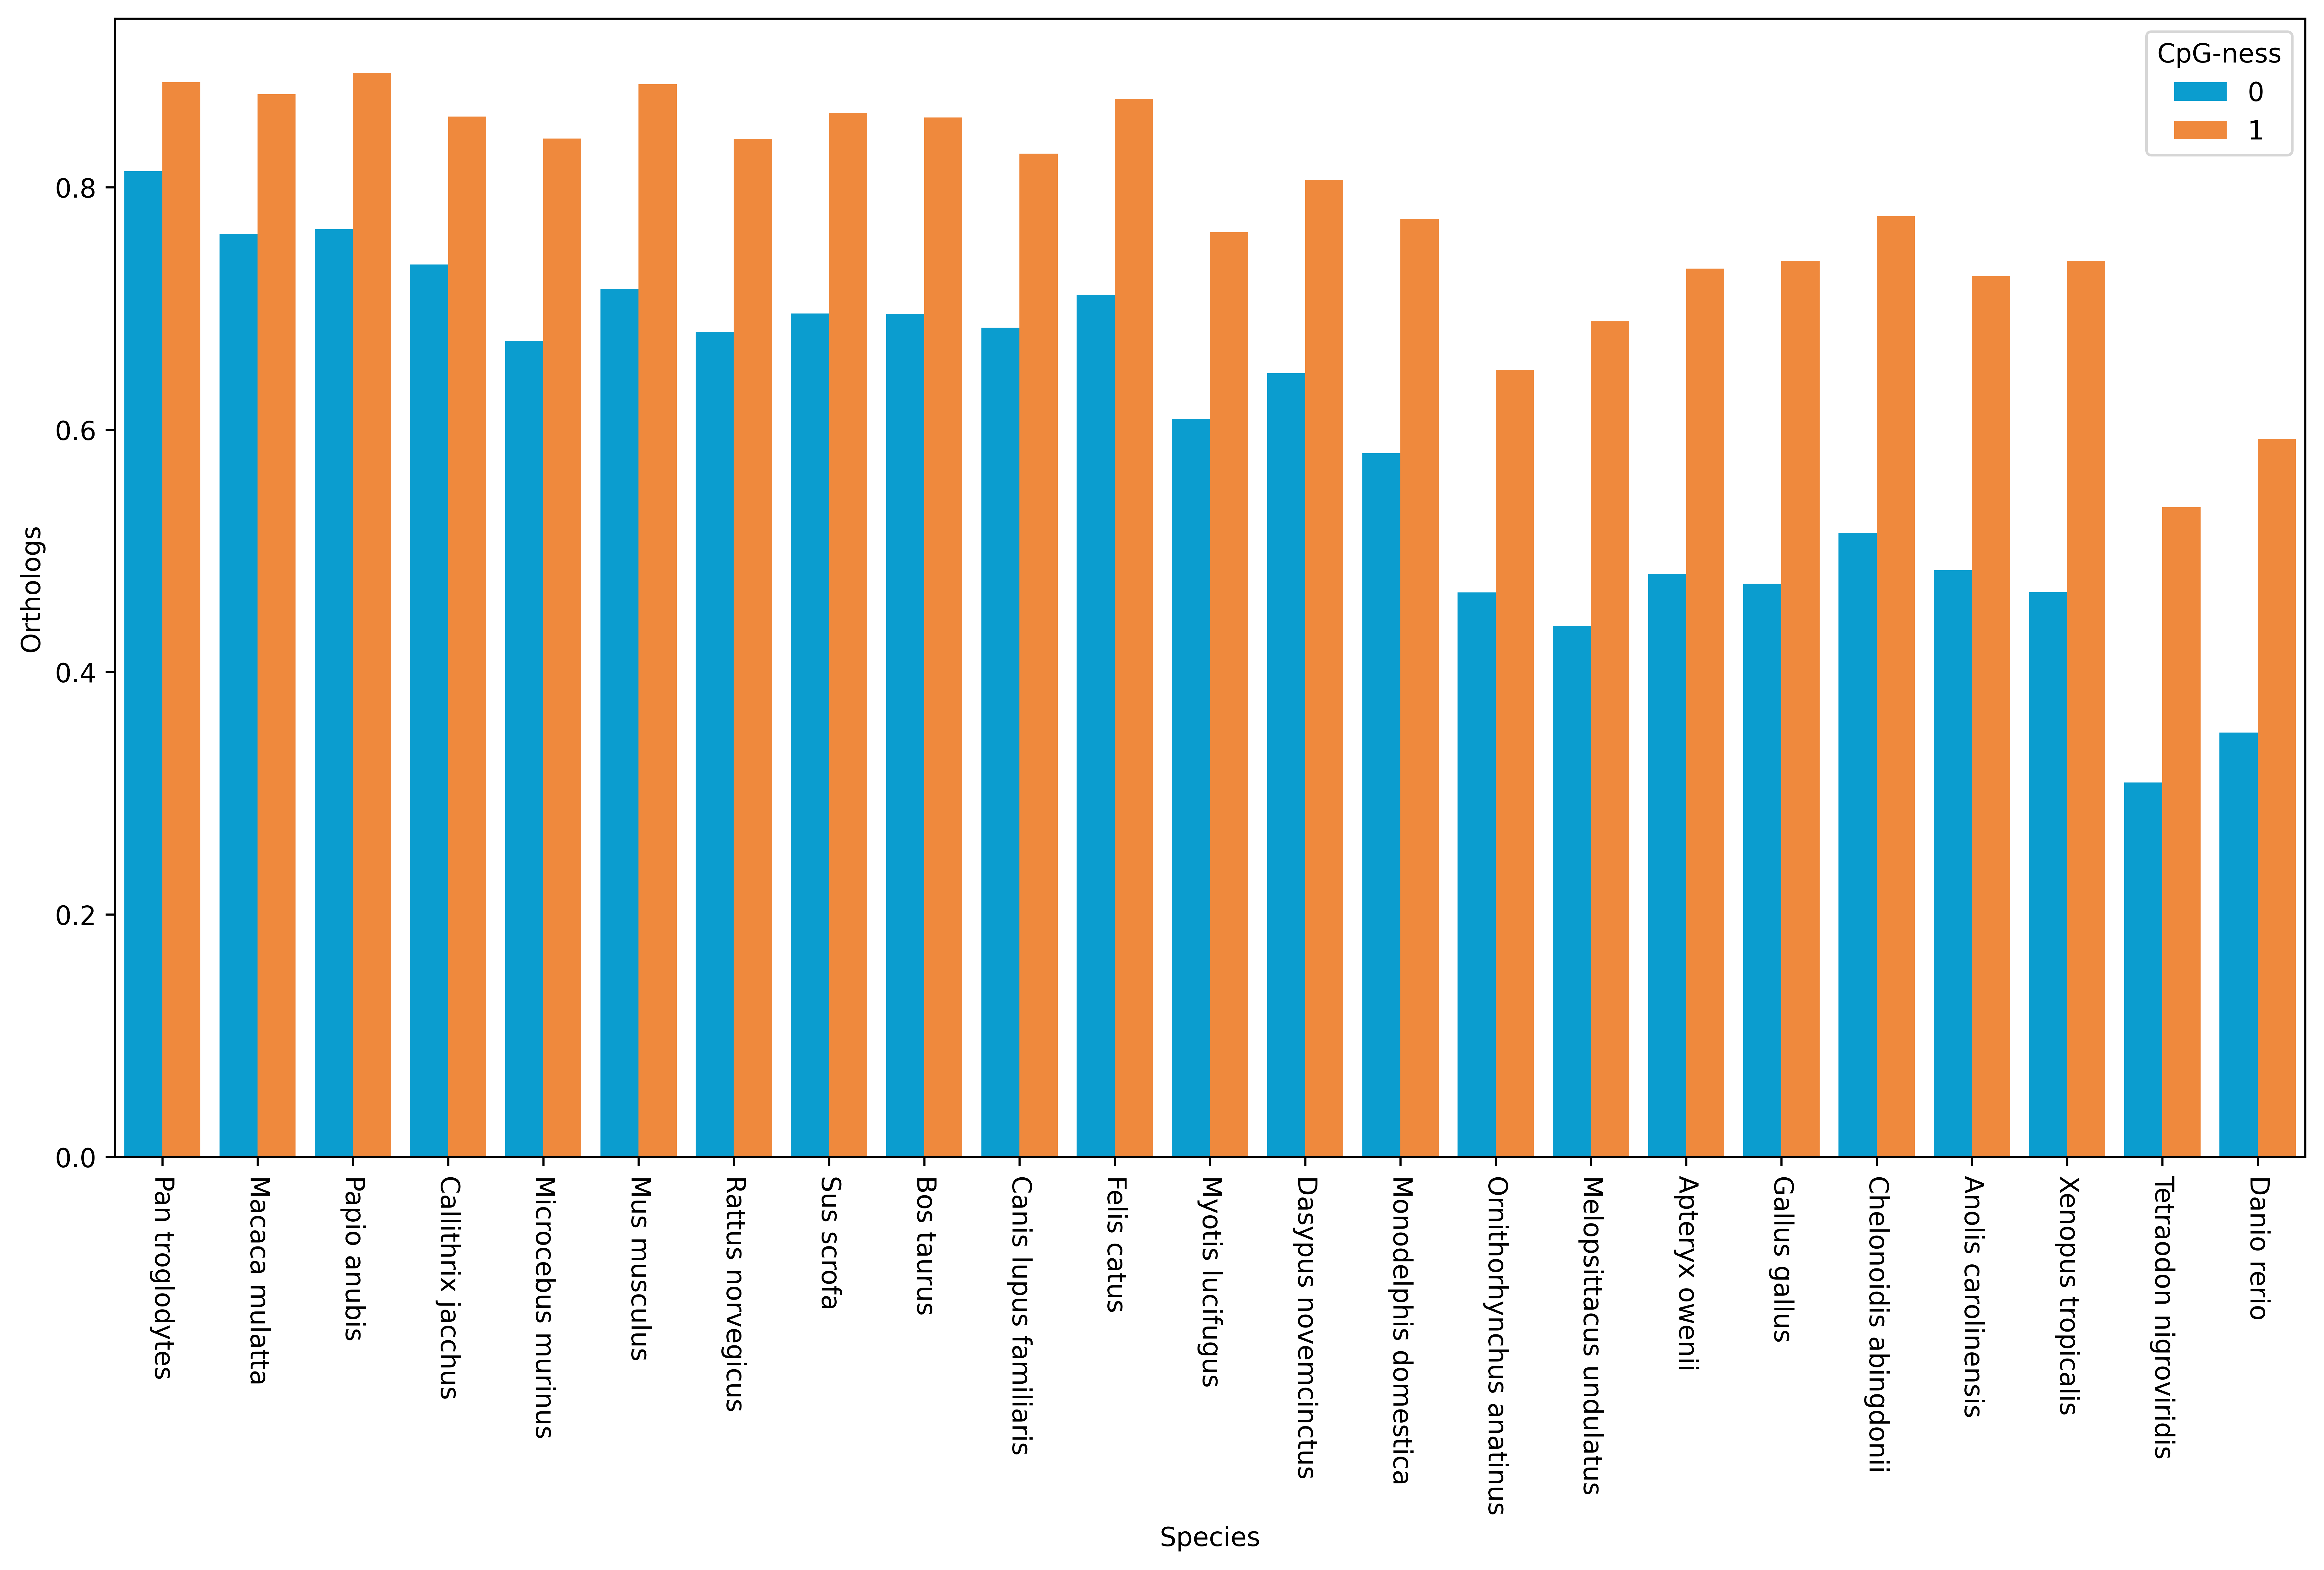

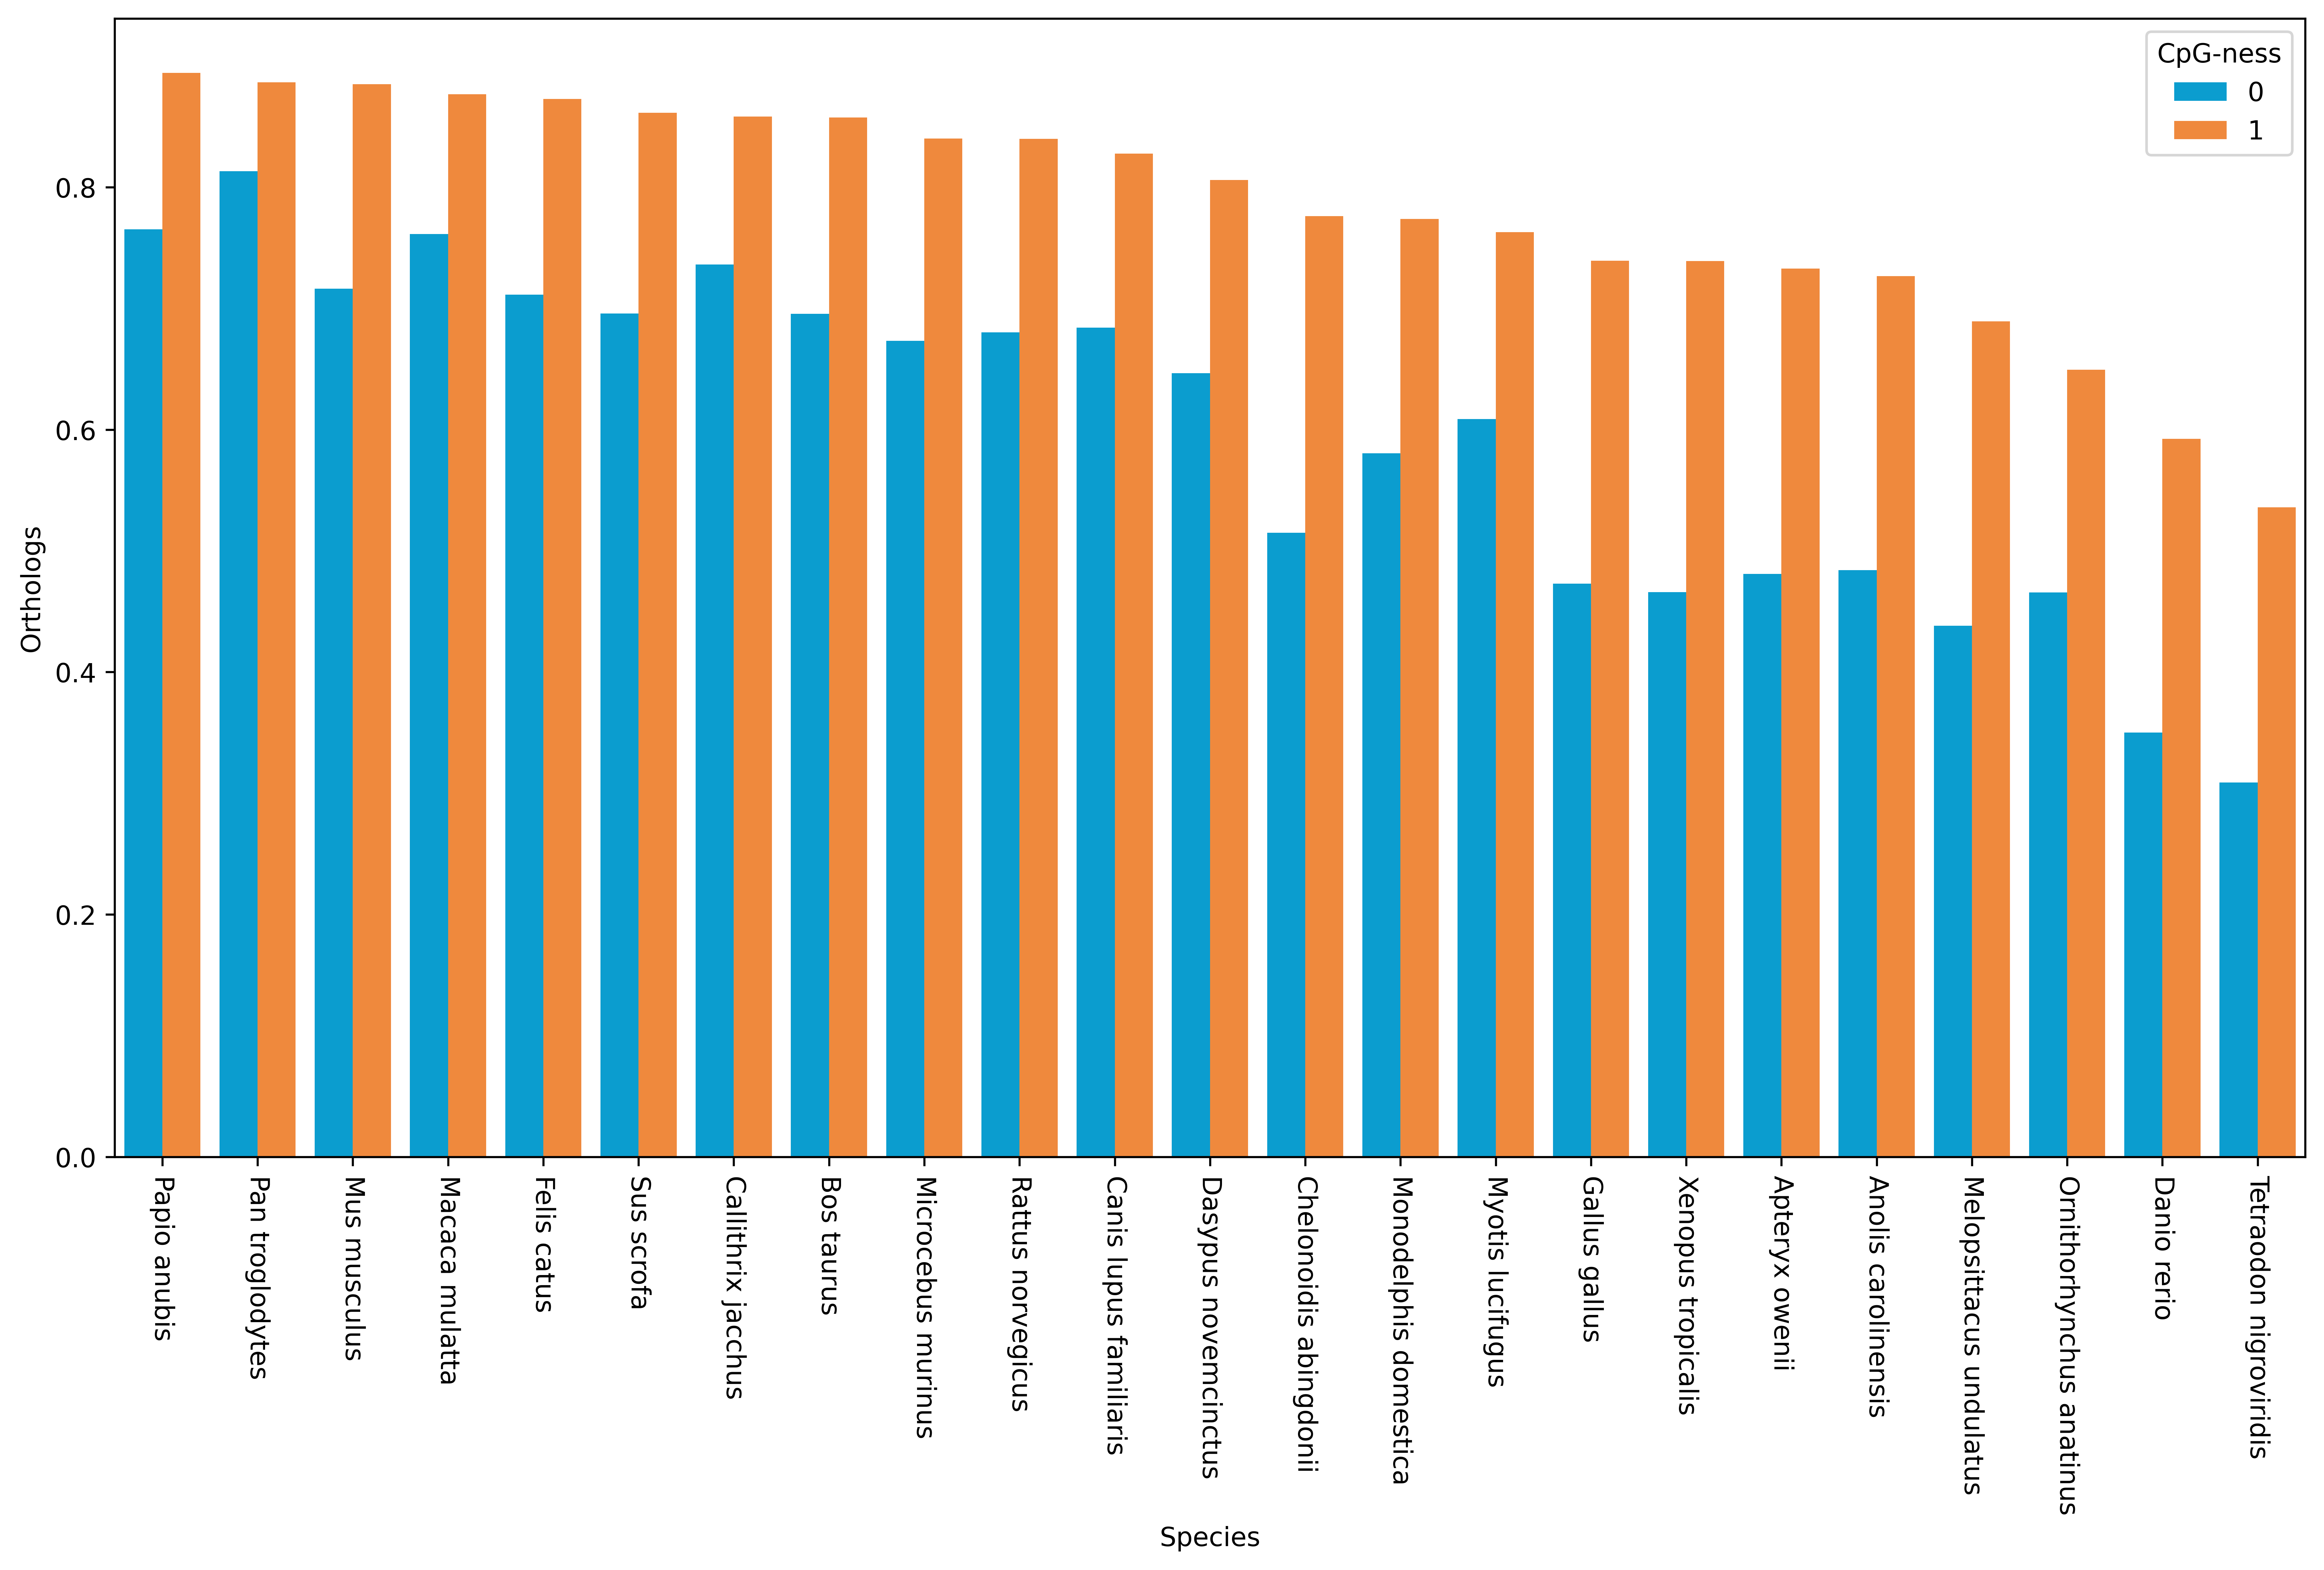

In [5]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame[frame['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame[frame['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio.pdf')

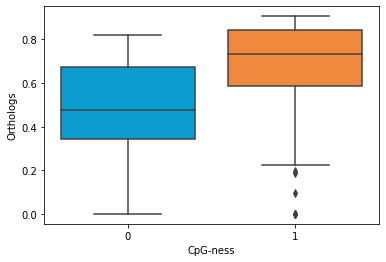

In [6]:
boxplot(data=frame, x="CpG-ness", y="Orthologs", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
pyplot.savefig('ortho-one-to-one-species-human-by-cgi-box.pdf', dpi=600)

In [7]:
import gffutils
canons = canons_by_gene(gffutils.FeatureDB('homo.db'), r'/mnt/hddata/2/evgeny/TAU/Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa')

In [8]:
from seaborn import violinplot, despine, boxplot, barplot
from pandas import DataFrame
from matplotlib import pyplot

frameo=DataFrame.from_records([(bo, len([g for g in cpg_less if bo in o2os[g]])/len(cpg_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full if bo in o2os[g]])/len(cpg_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frameo=frameo.sort_values("Orthologs", ascending=False)
frameelife=DataFrame.from_records([(bo, len([g for g in cpg_less_elife if bo in o2os[g]])/len(cpg_less_elife), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full_elife if bo in o2os[g]])/len(cpg_full_elife), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frameelife=frameelife.sort_values("Orthologs", ascending=False)


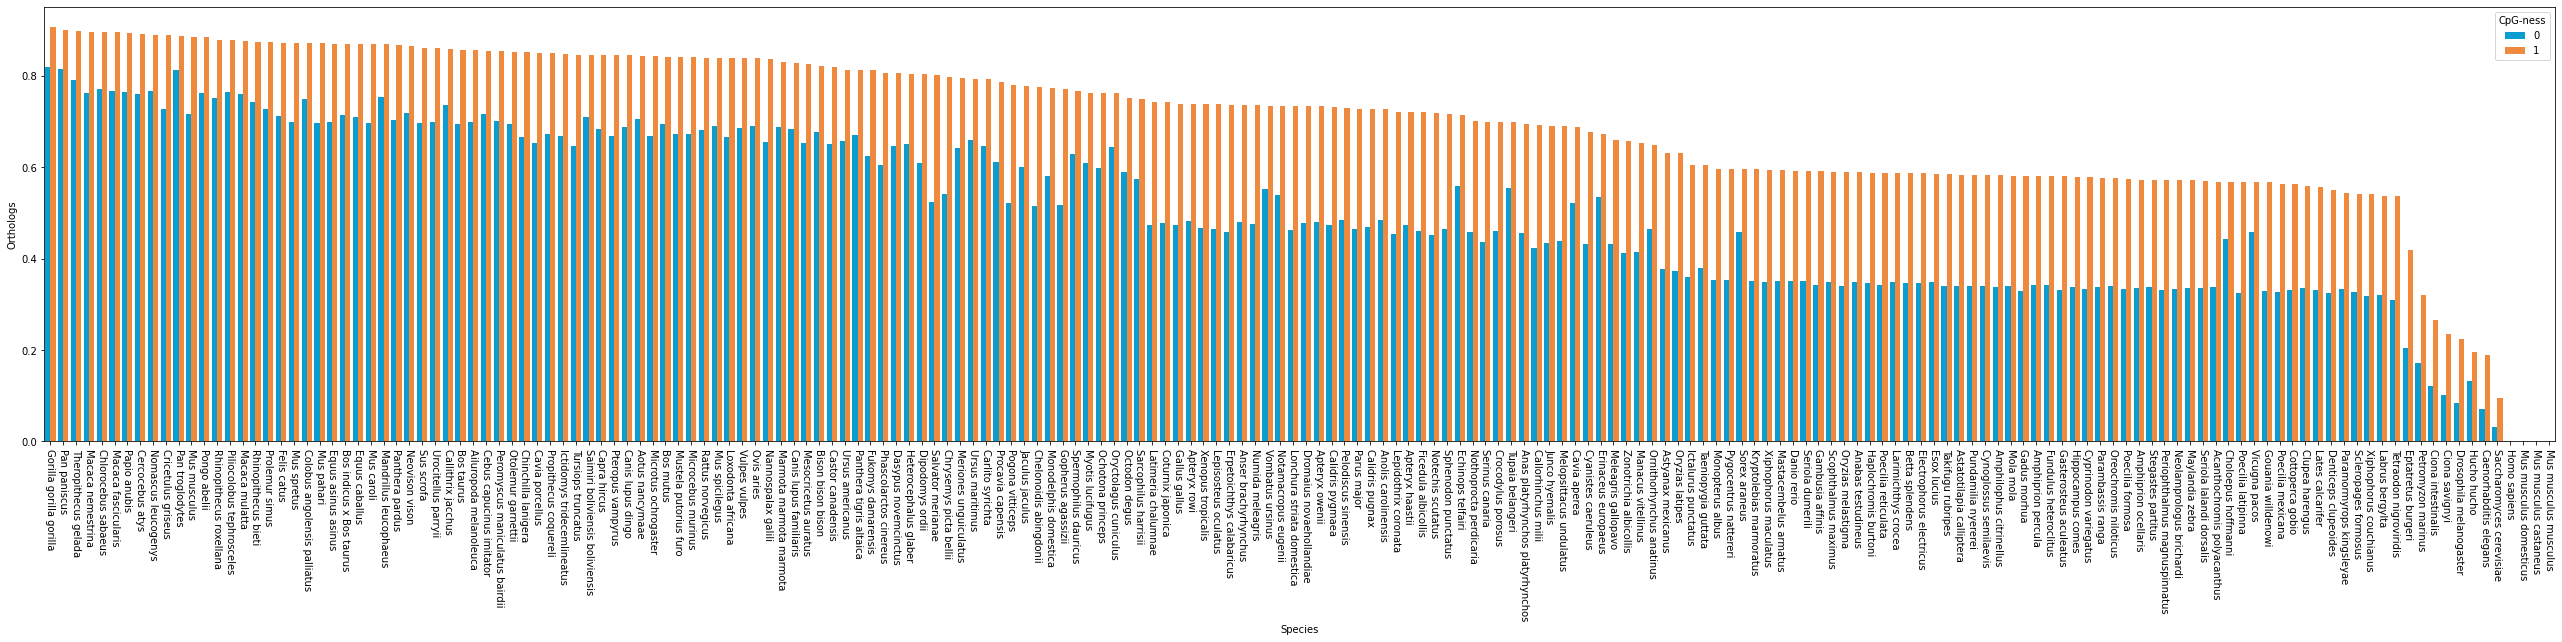

In [36]:
fig, ax = pyplot.subplots(figsize=(45,8))
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=frameo, x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-bars.pdf')

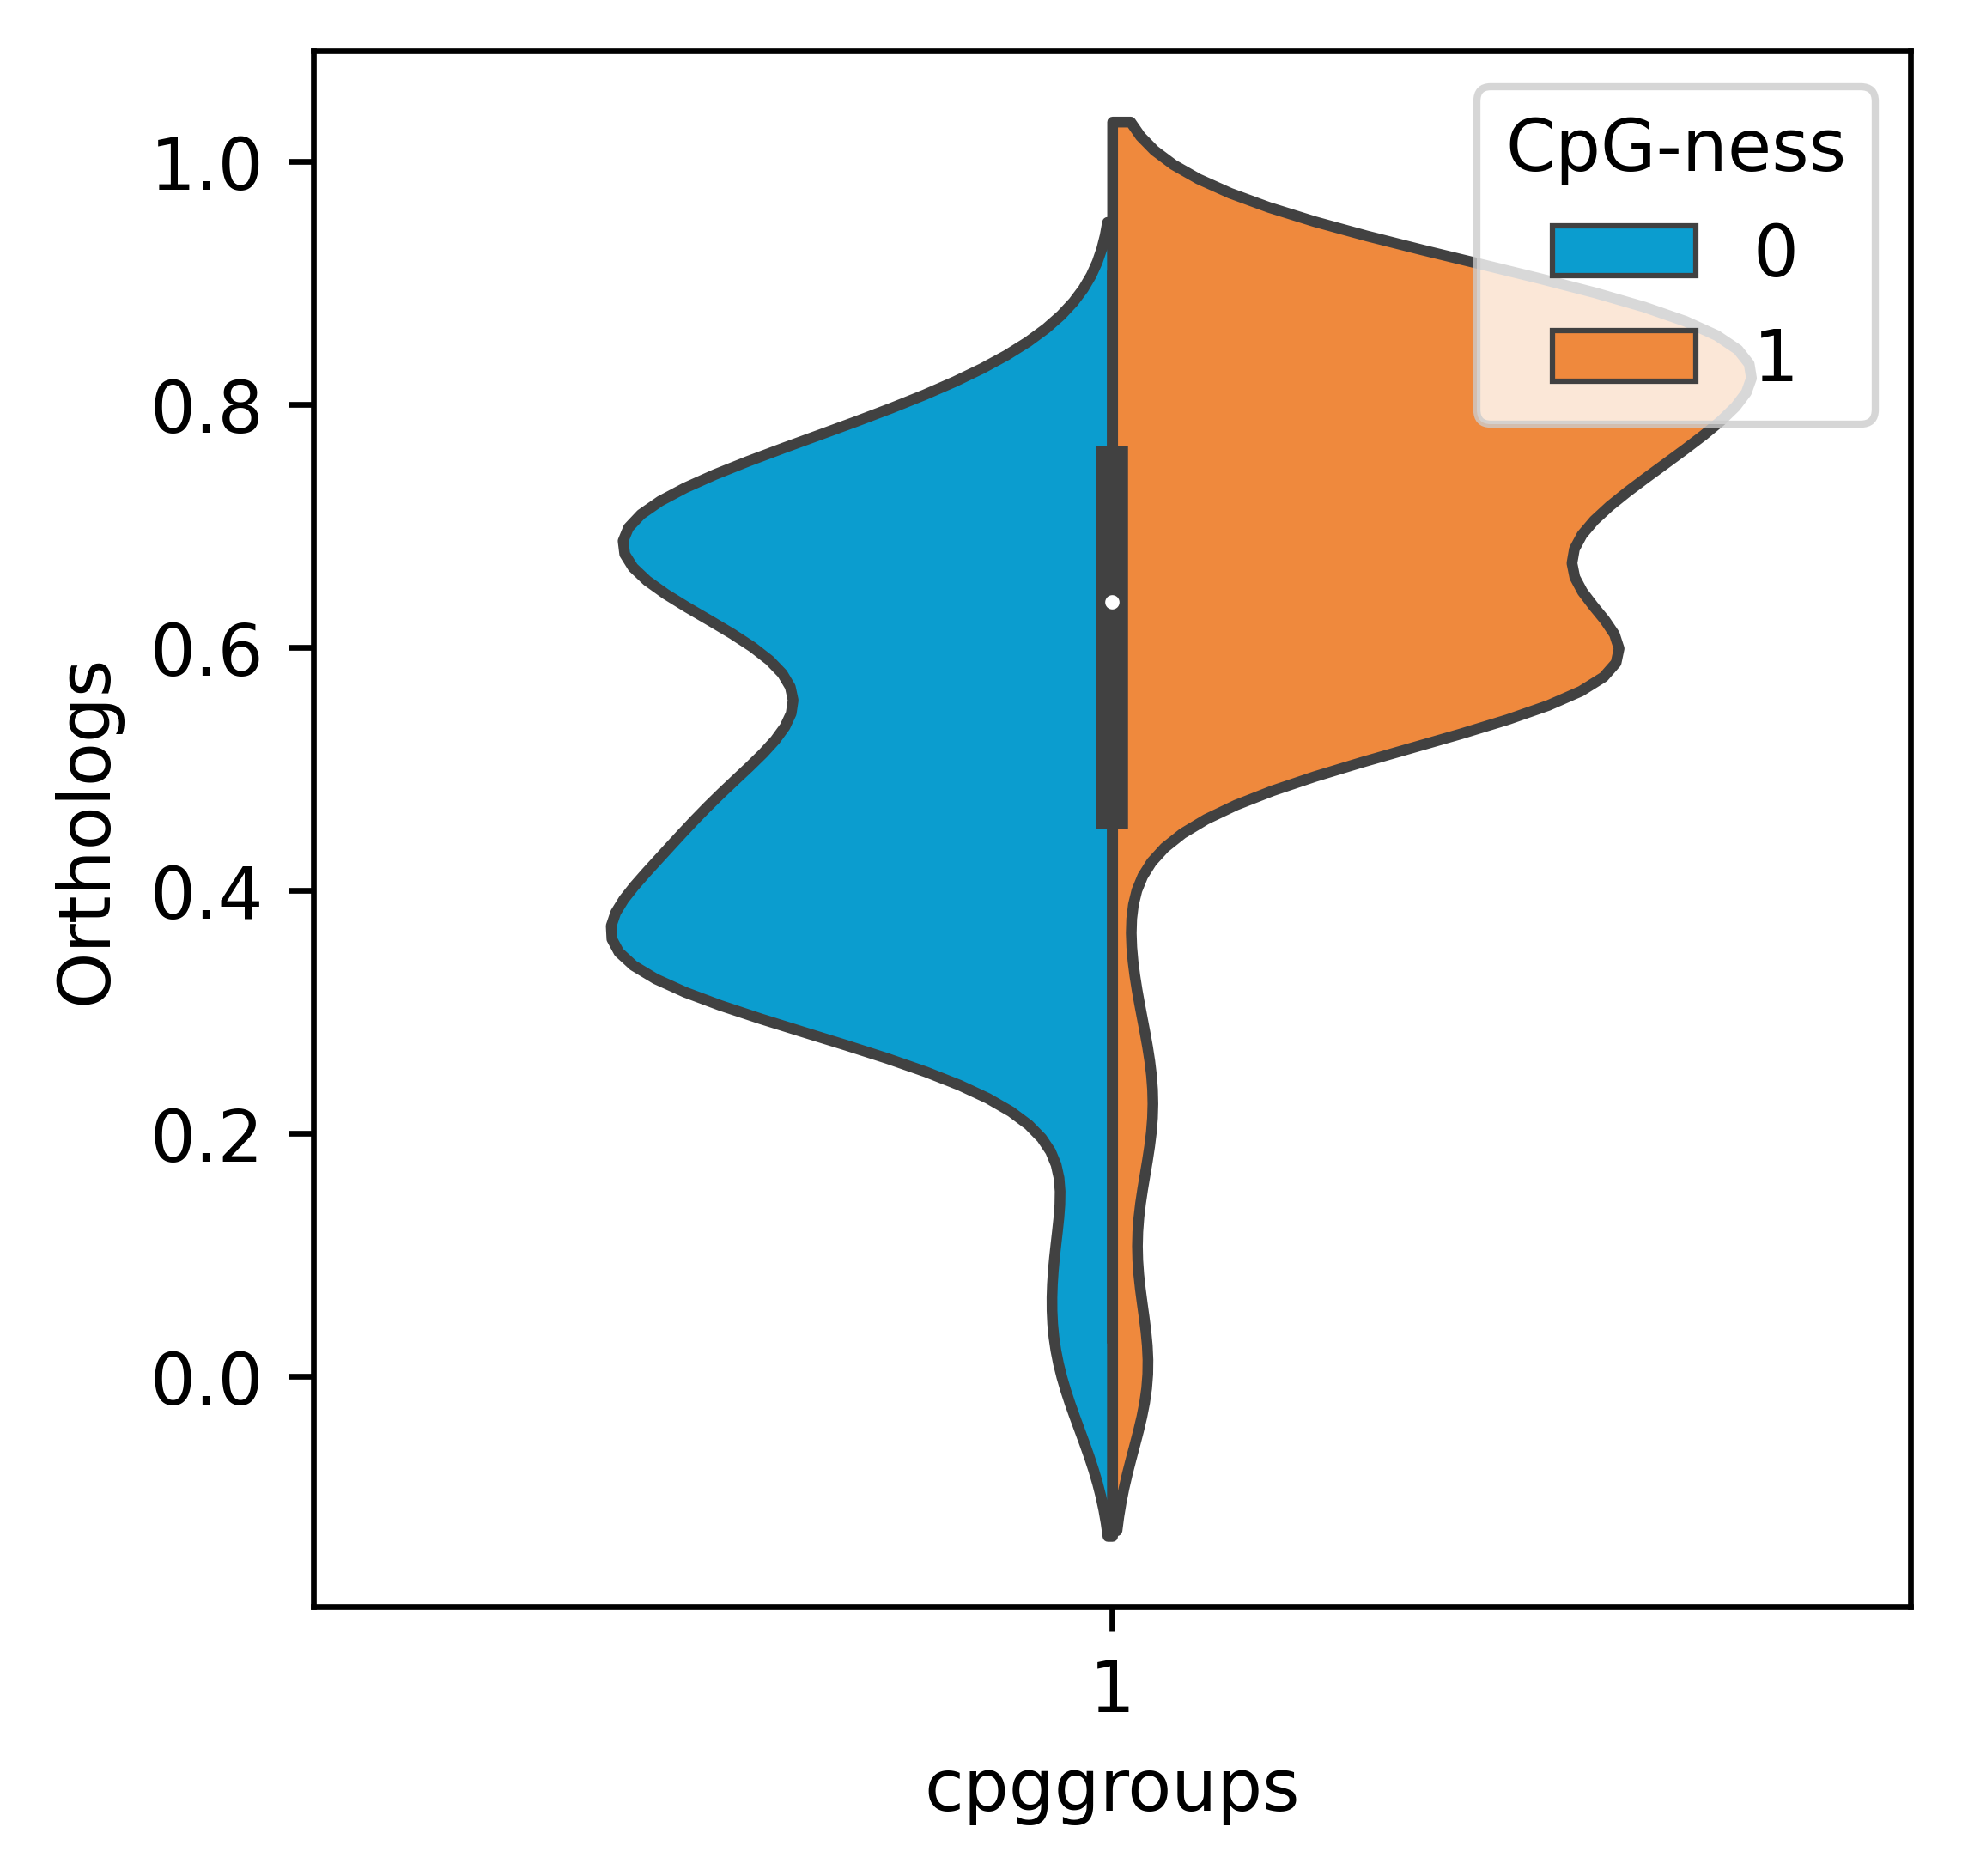

In [37]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frameo.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin.pdf')

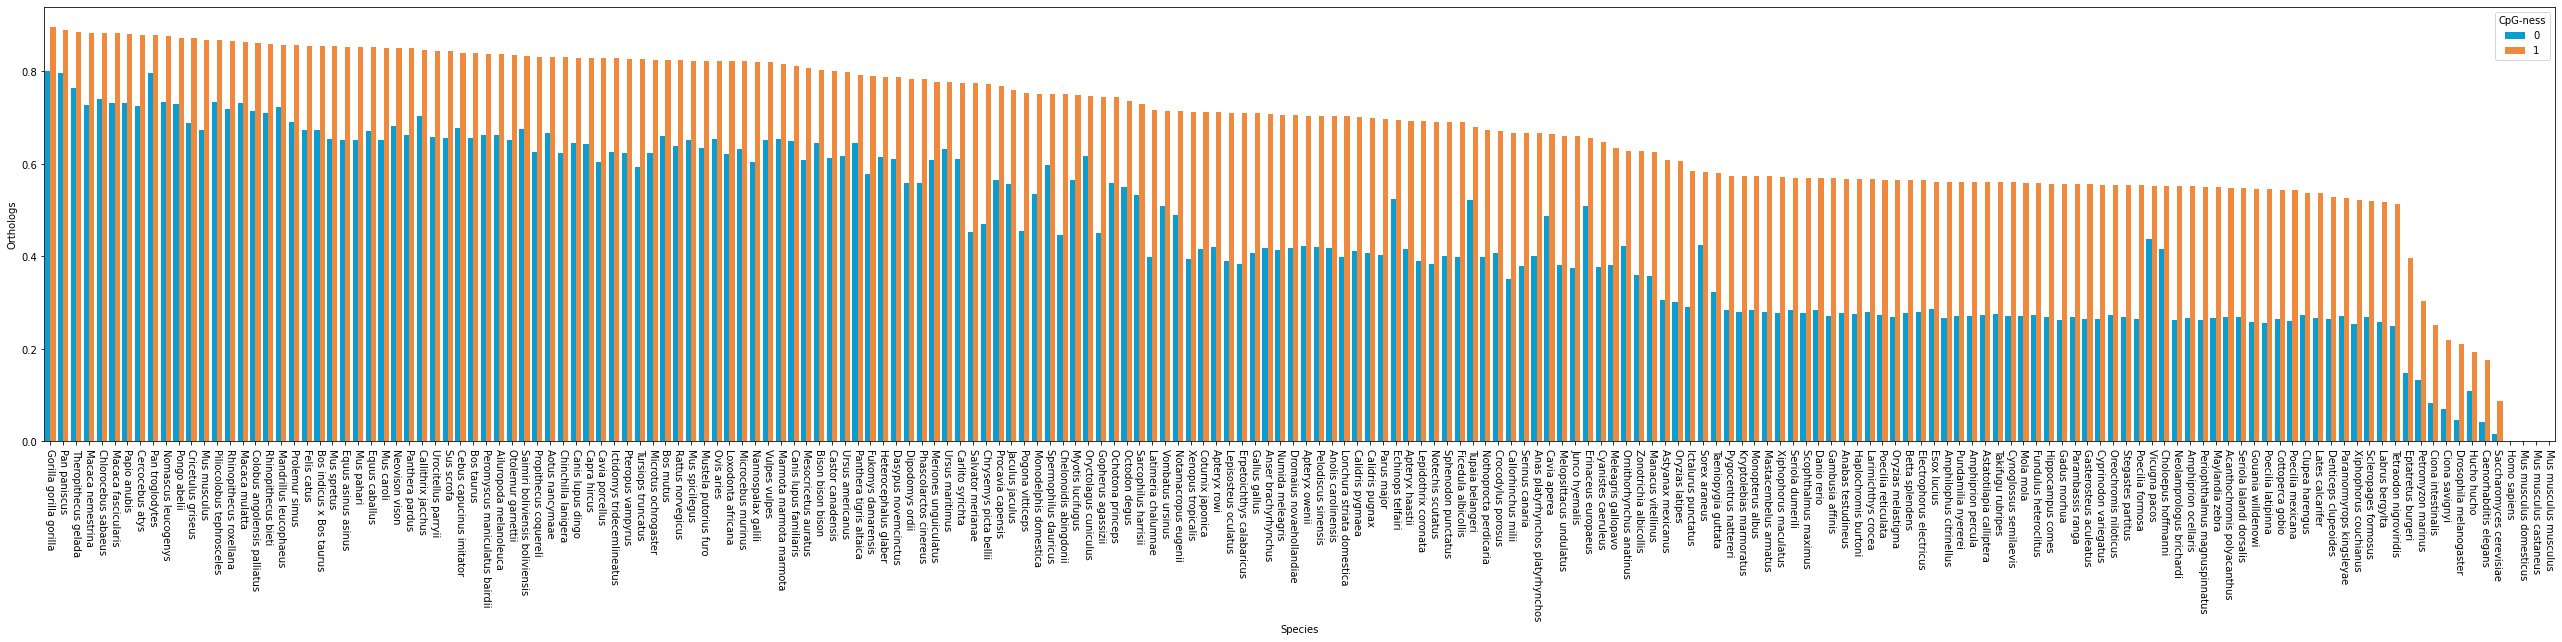

In [38]:
fig, ax = pyplot.subplots(figsize=(45,8))
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=frameelife, x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-bars-elife.pdf')

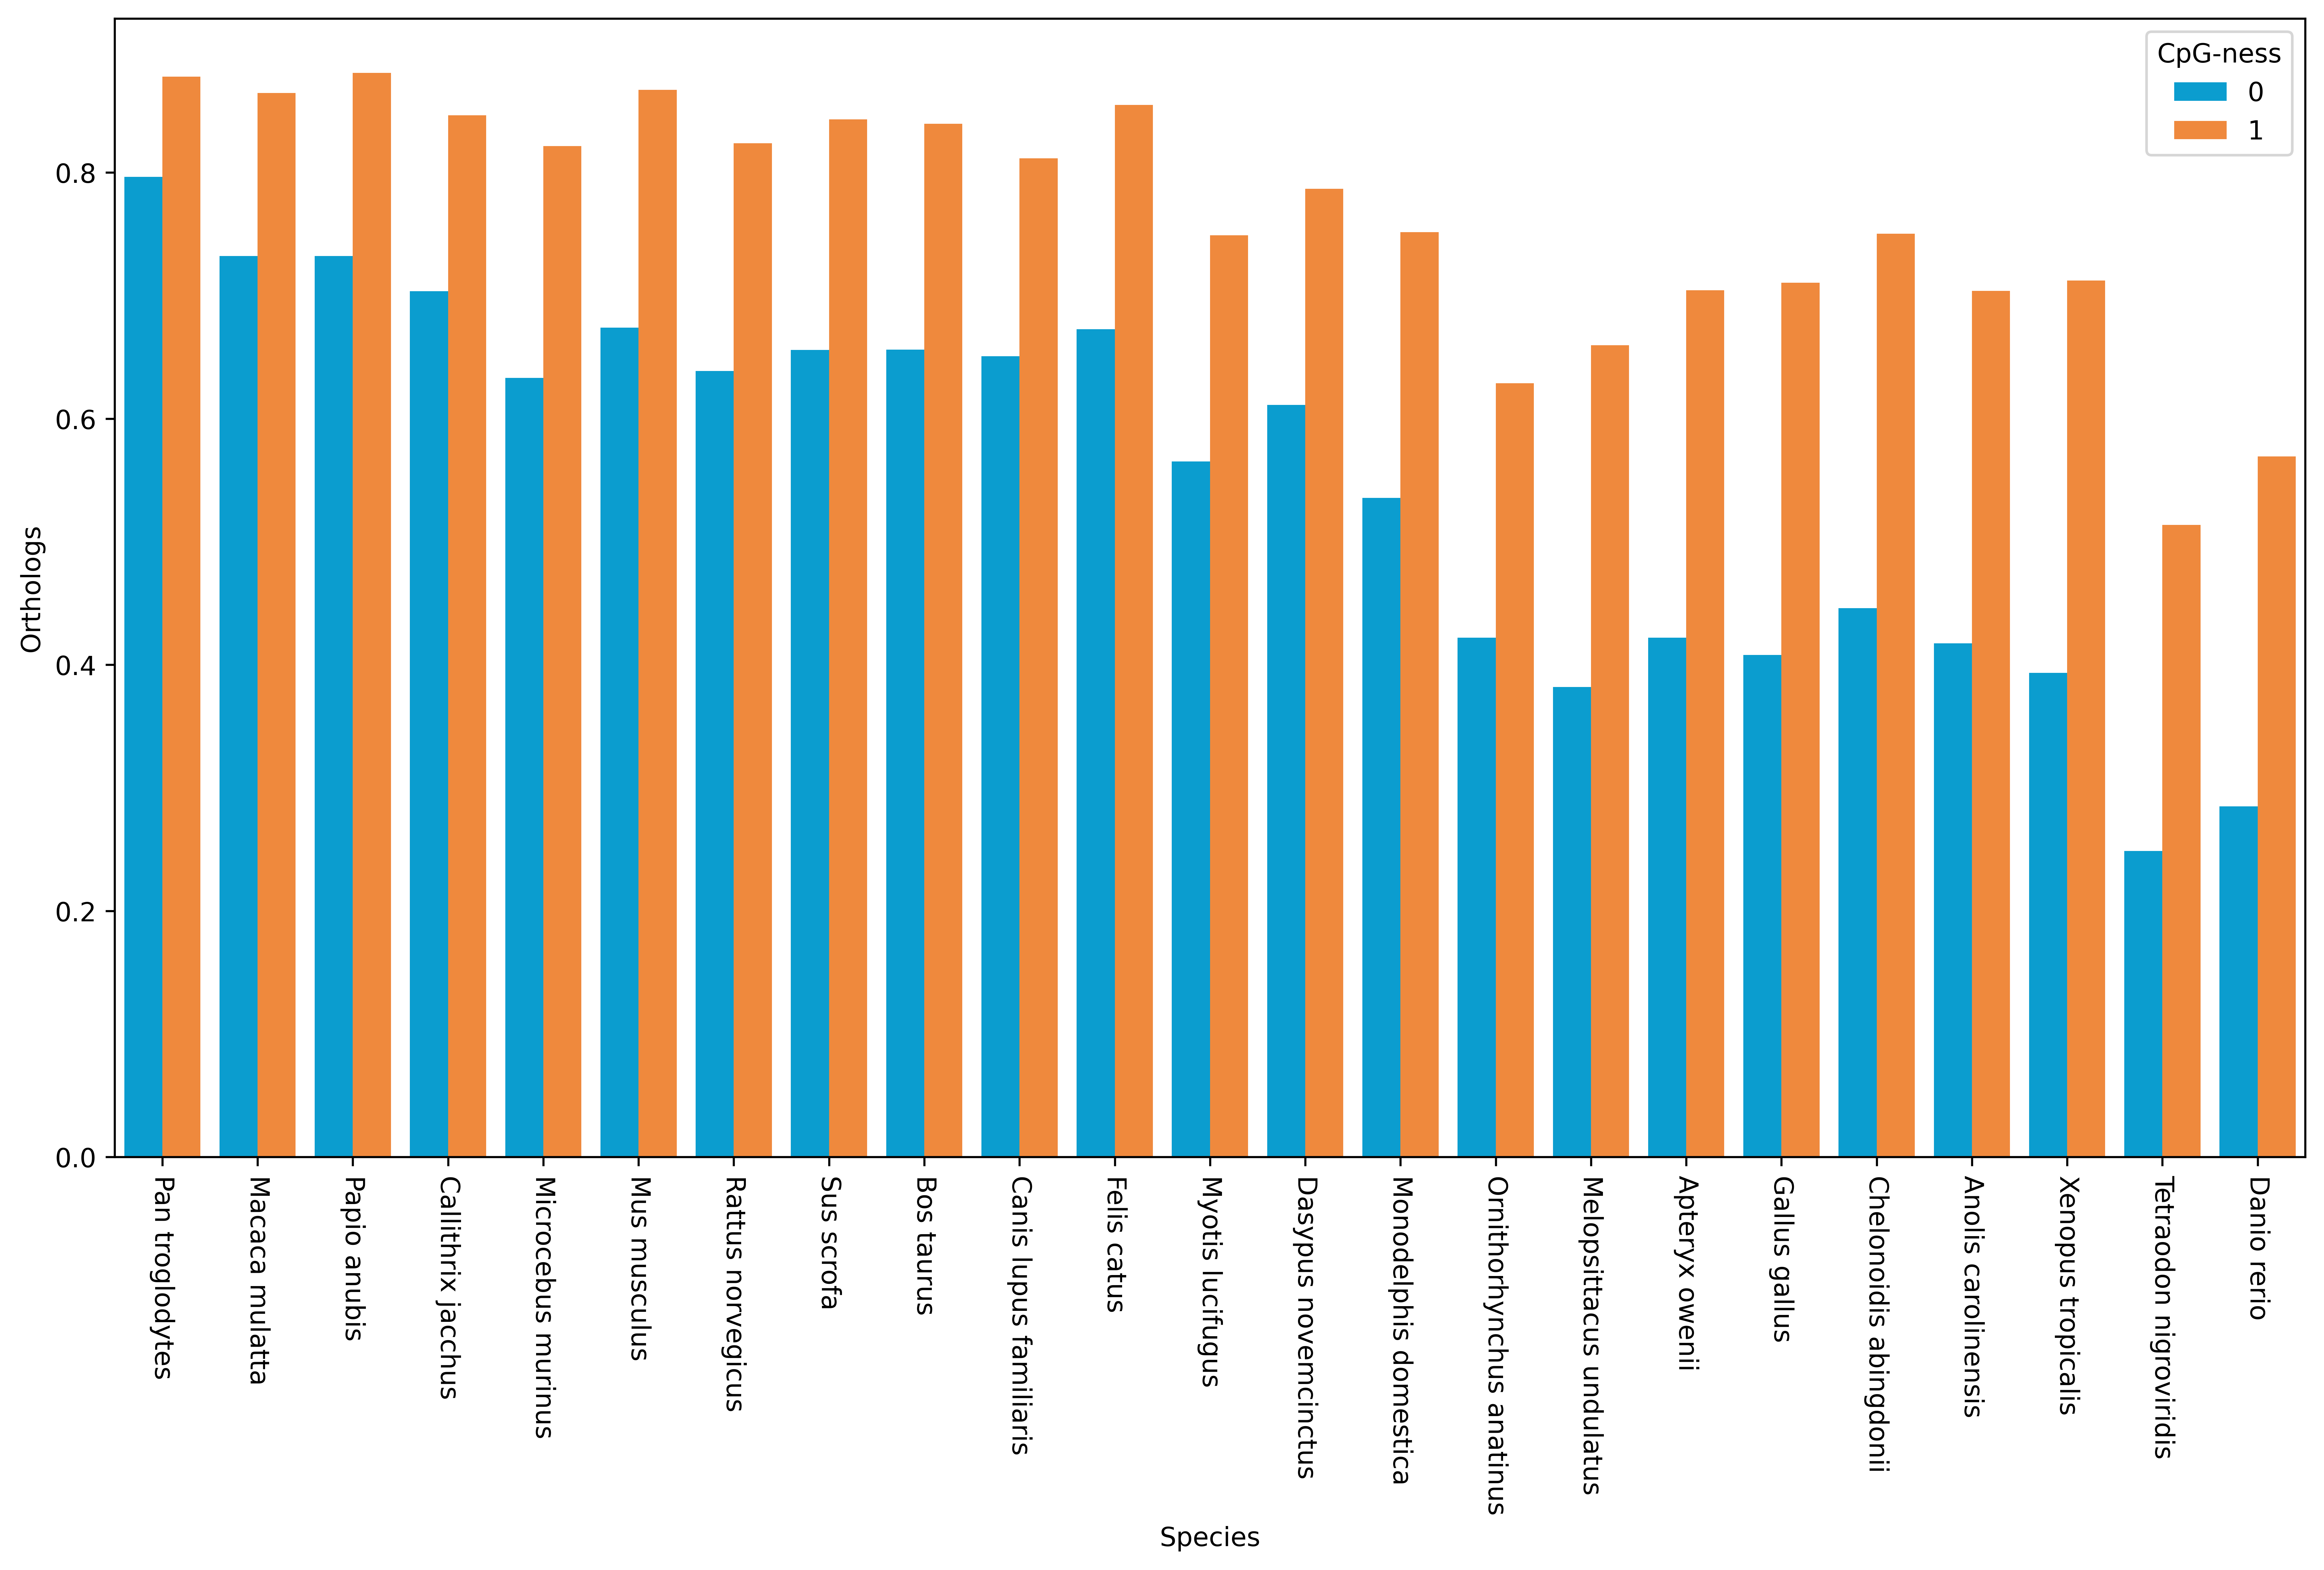

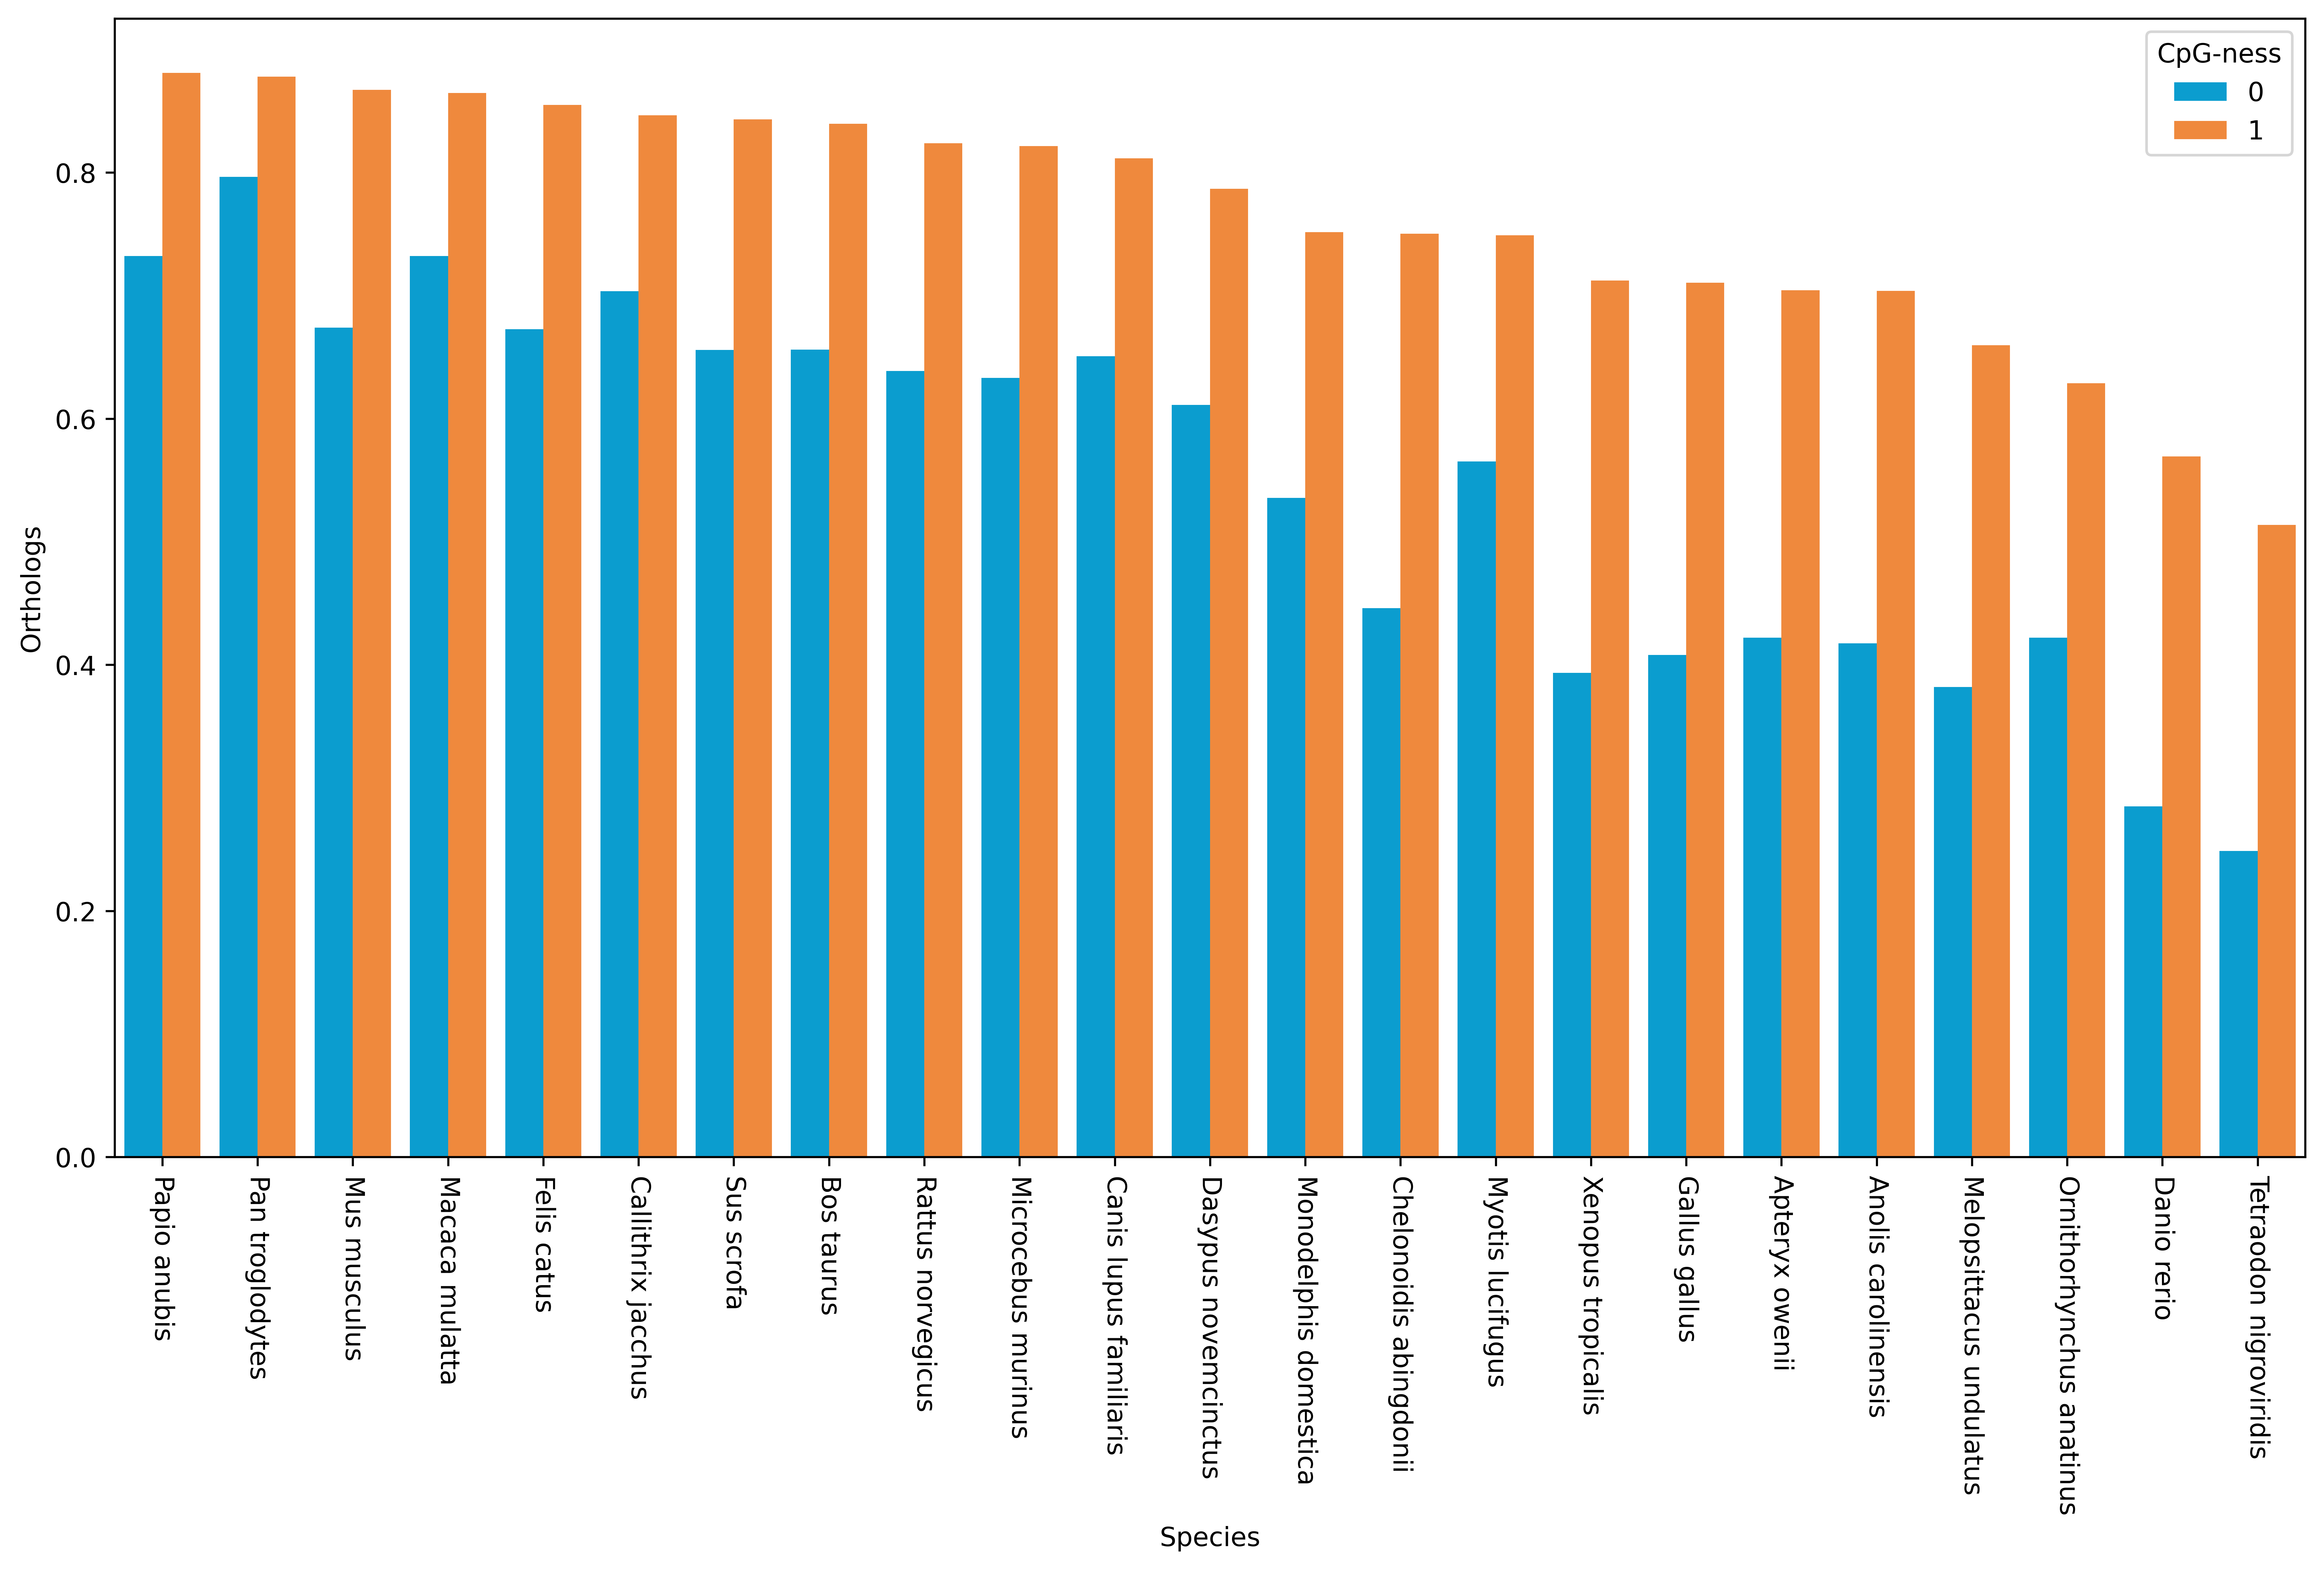

In [41]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frameelife[frameelife['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny-elife.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frameelife[frameelife['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio-elife.pdf')

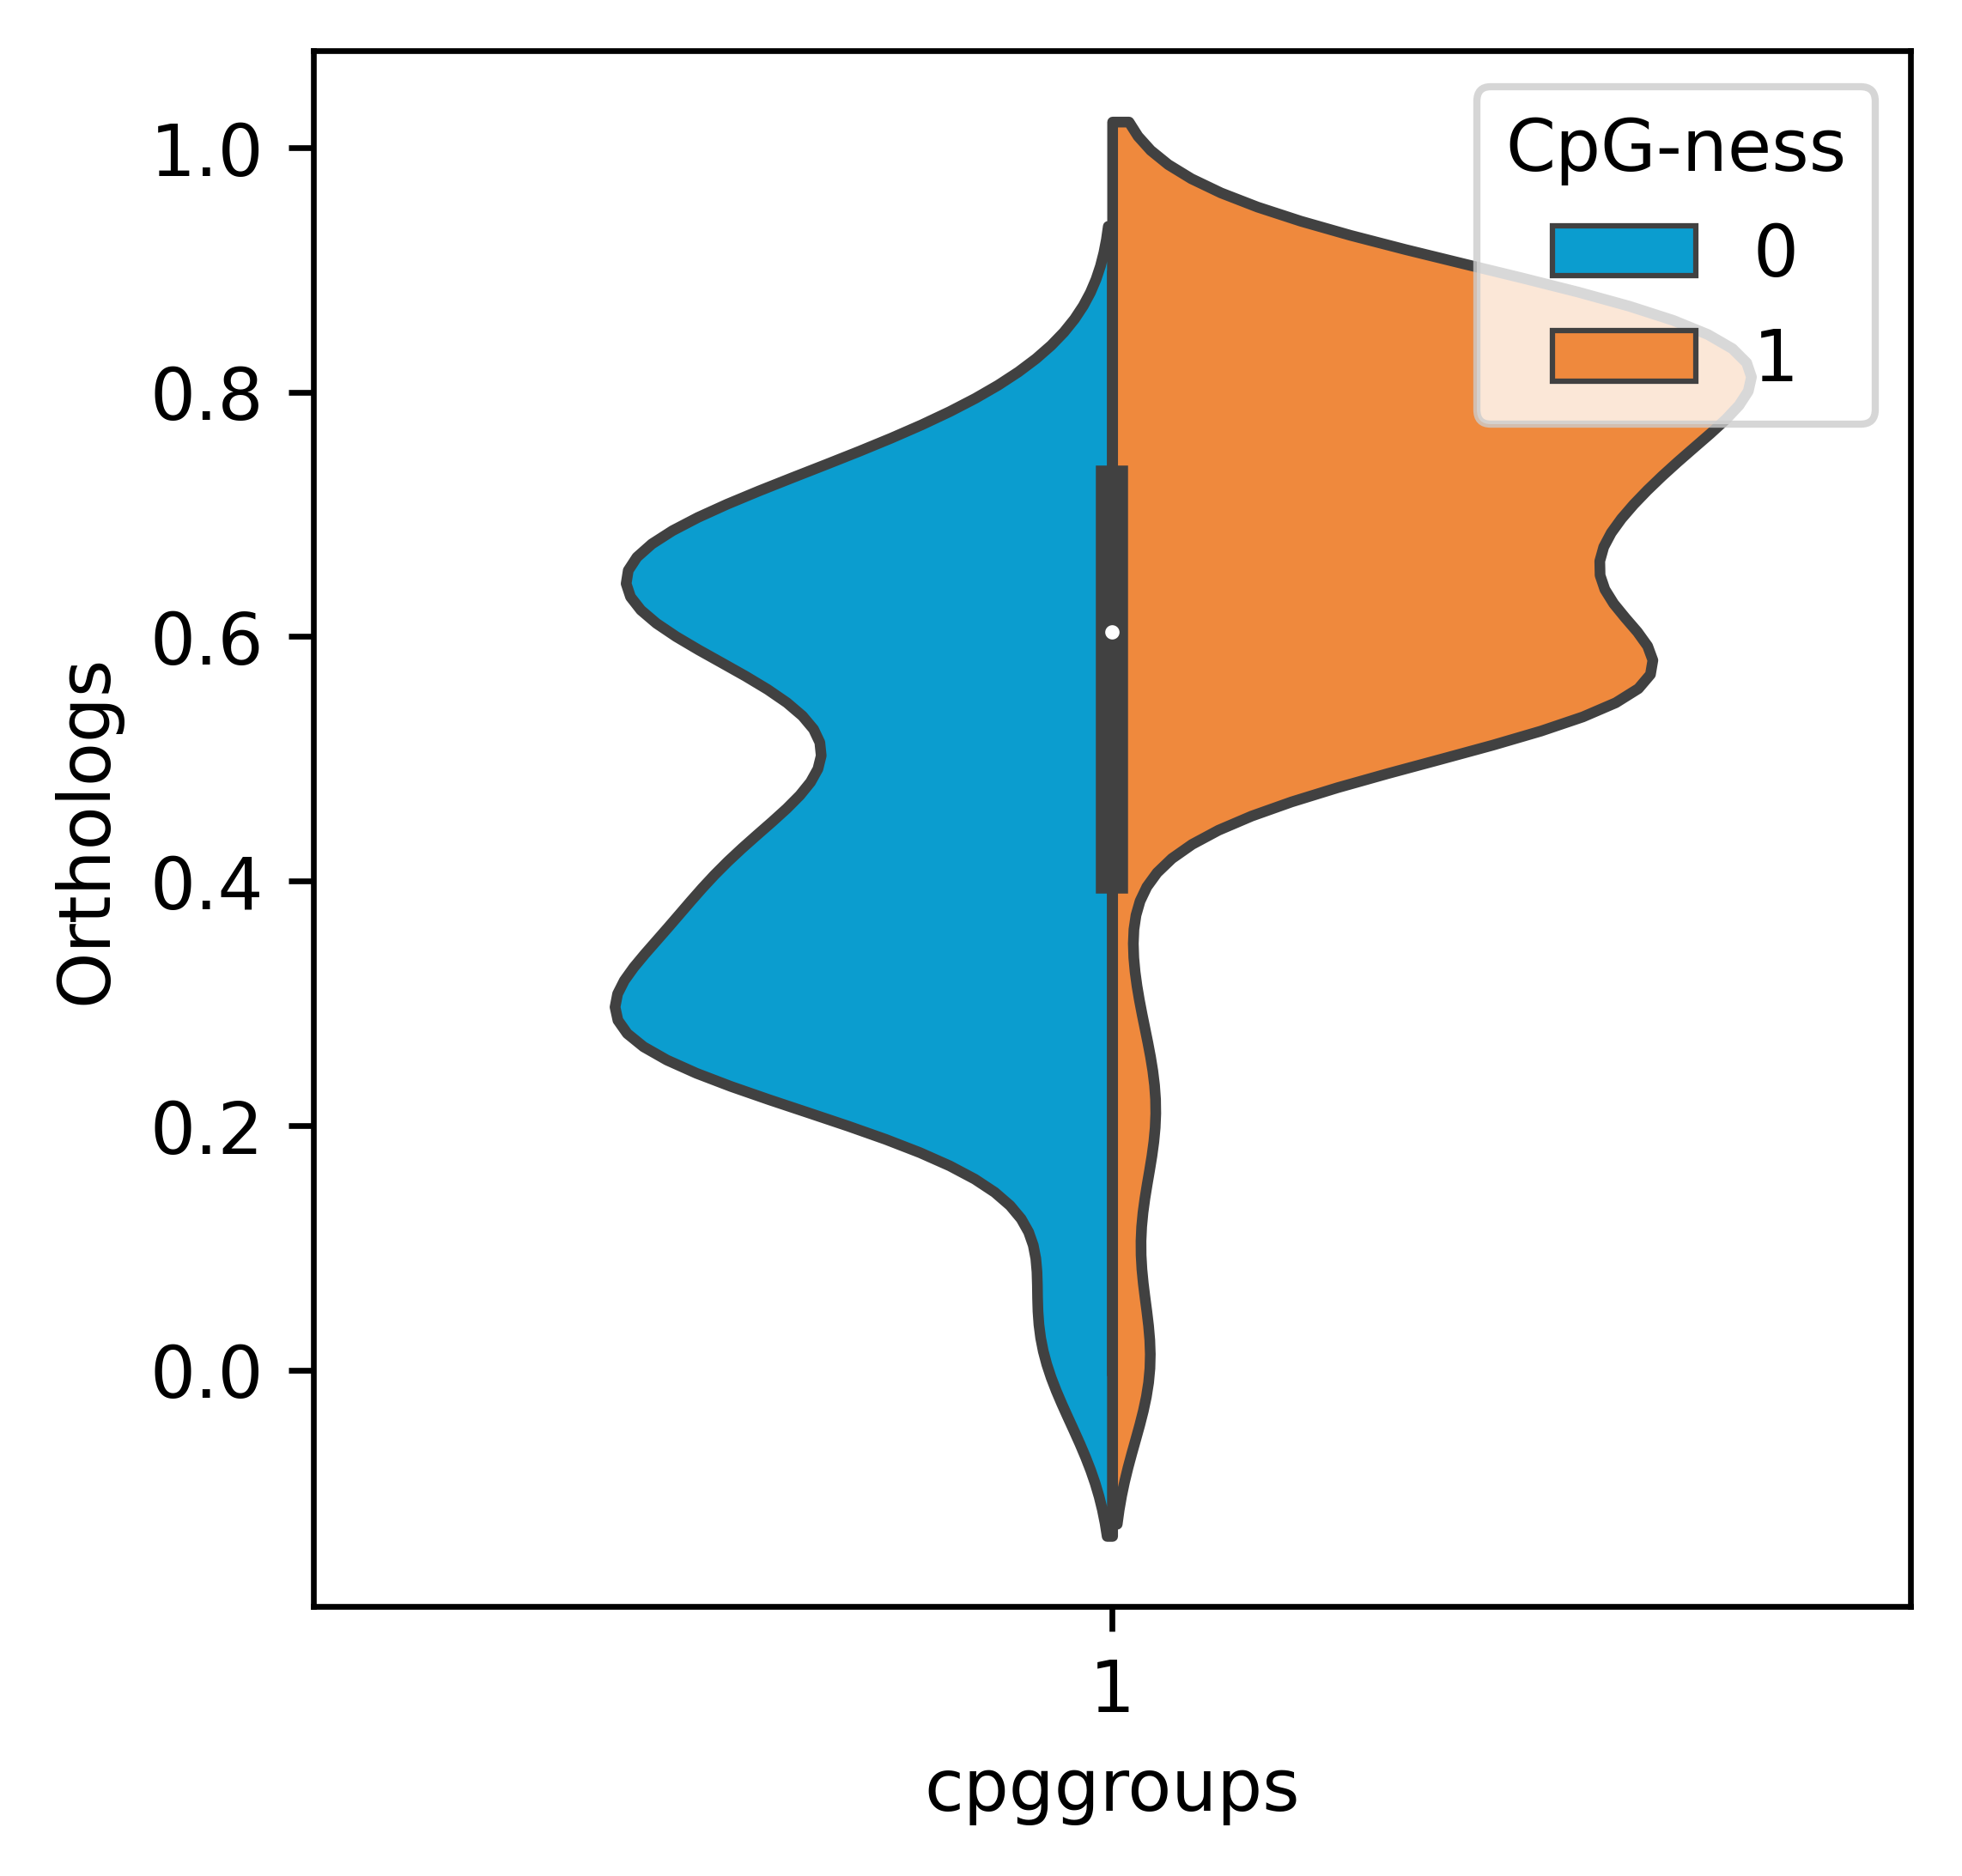

In [39]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frameelife.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin-elife.pdf')

The portion of species for which an ortholog exists for each genes - for cpg_less and cpg_full groups

In [40]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney on -300+100: 50%% %s'%str(mannwhitneyu(frameo[frameo['CpG-ness']==0]['Orthologs'], frameo[frameo['CpG-ness']==1]['Orthologs'], alternative='less')))
print('Mann-Whitney on -1000+1000: 1bp %s'%str(mannwhitneyu(frameelife[frameelife['CpG-ness']==0]['Orthologs'], frameelife[frameelife['CpG-ness']==1]['Orthologs'], alternative='less')))

Mann-Whitney on -300+100: 50% MannwhitneyuResult(statistic=8074.0, pvalue=1.605152875961793e-23)
Mann-Whitney on -1000+1000: 1bp MannwhitneyuResult(statistic=7565.0, pvalue=1.5329809464563394e-25)


In [19]:
pickle.dump(frame, open('/data/db/import/save/orthologs.pkl', 'wb'))